In [1]:
import tensorflow as tf

In [7]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD,Adam,Nadam,RMSprop
from tensorflow.keras.losses import mean_squared_logarithmic_error,categorical_crossentropy,mean_squared_error,sparse_categorical_crossentropy
from tensorflow.keras.activations import sigmoid,tanh,relu,softmax
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover sweater', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape,y_train.shape,x_test.shape,x_train.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (60000, 28, 28))

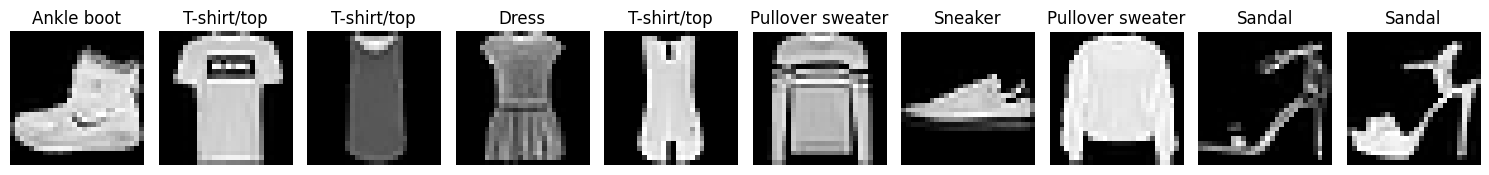

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(15, 2))

for i in range(10):
    axes[i].imshow(x_train[i], cmap="gray")
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [13]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [14]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [15]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [16]:
model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
callbacks=[EarlyStopping(monitor='val_accuracy',patience=2),ModelCheckpoint(filepath='model.h5',monitor='val_accuracy')]

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs=5,callbacks=callbacks,batch_size=500,verbose=1)

Epoch 1/5
96/96 [==============================] - 2s 14ms/step - loss: 9.3329 - accuracy: 0.6831 - val_loss: 2.4037 - val_accuracy: 0.7650
Epoch 2/5
12/96 [==>...........................] - ETA: 0s - loss: 2.4643 - accuracy: 0.7605

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 1s 12ms/step - loss: 2.0503 - accuracy: 0.7699 - val_loss: 1.6815 - val_accuracy: 0.7608
Epoch 3/5
96/96 [==============================] - 2s 18ms/step - loss: 1.3646 - accuracy: 0.7883 - val_loss: 1.2313 - val_accuracy: 0.7915
Epoch 4/5
96/96 [==============================] - 2s 16ms/step - loss: 1.0100 - accuracy: 0.8016 - val_loss: 1.0191 - val_accuracy: 0.7973
Epoch 5/5
96/96 [==============================] - 1s 12ms/step - loss: 0.8143 - accuracy: 0.8119 - val_loss: 0.9071 - val_accuracy: 0.8021


In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.9841 - accuracy: 0.7942
[0.9840794205665588, 0.7942000031471252]


Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 3.2264 - accuracy: 0.7349 - val_loss: 0.7909 - val_accuracy: 0.7592
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6333 - accuracy: 0.8017 - val_loss: 0.6853 - val_accuracy: 0.7884
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5336 - accuracy: 0.8214 - val_loss: 0.5537 - val_accuracy: 0.8143
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4929 - accuracy: 0.8293 - val_loss: 0.5019 - val_accuracy: 0.8246
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.8100
the testing accuracy is:0.8100000023841858


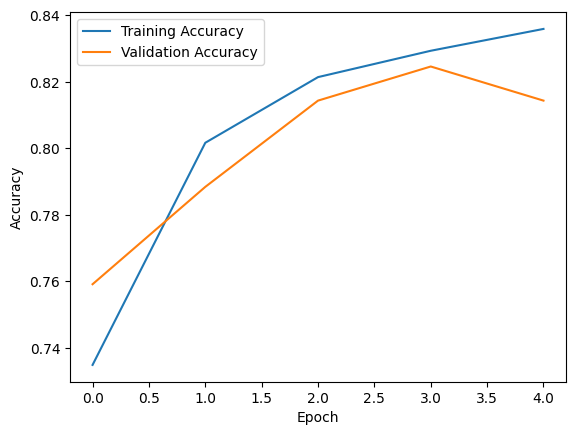

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=5,batch_size=32,validation_split=0.2)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'the testing accuracy is:{test_acc}')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.9420 - accuracy: 0.7579 - val_loss: 1.0216 - val_accuracy: 0.7296
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.0102 - accuracy: 0.6894 - val_loss: 0.9937 - val_accuracy: 0.6480
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7779 - accuracy: 0.7087 - val_loss: 1.0803 - val_accuracy: 0.6861
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7132 - accuracy: 0.7783 - val_loss: 0.9557 - val_accuracy: 0.7458
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0028 - accuracy: 0.6936 - val_loss: 1.3963 - val_accuracy: 0.5462
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0827 - accuracy: 0.5877 - val_loss: 1.1185 - val_accuracy: 0.5251
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9782 - accuracy: 0.6158 - val_loss: 1.1501 - val_accuracy

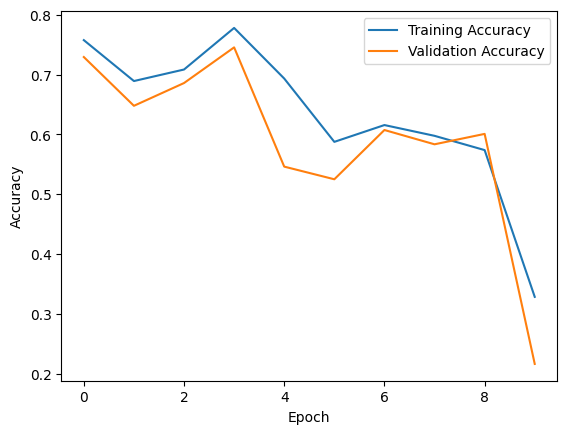

In [ ]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy (sgd): {test_acc}')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=32,validation_split=0.2)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'the testing accuracy (nadam)is:{test_acc}')

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3743 - accuracy: 0.8692 - val_loss: 0.4175 - val_accuracy: 0.8583
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3595 - accuracy: 0.8711 - val_loss: 0.4091 - val_accuracy: 0.8582
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3588 - accuracy: 0.8738 - val_loss: 0.4040 - val_accuracy: 0.8674
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3505 - accuracy: 0.8740 - val_loss: 0.4103 - val_accuracy: 0.8651
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3453 - accuracy: 0.8770 - val_loss: 0.4672 - val_accuracy: 0.8443
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3483 - accuracy: 0.8768 - val_loss: 0.4104 - val_accuracy: 0.8641
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3371 - accuracy: 0.8784 - val_loss: 0.4518 - val_accuracy

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.3302 - accuracy: 0.8836 - val_loss: 0.4406 - val_accuracy: 0.8629
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3223 - accuracy: 0.8864 - val_loss: 0.4243 - val_accuracy: 0.8645
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3212 - accuracy: 0.8839 - val_loss: 0.4412 - val_accuracy: 0.8671
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3205 - accuracy: 0.8848 - val_loss: 0.4010 - val_accuracy: 0.8701
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3153 - accuracy: 0.8861 - val_loss: 0.4201 - val_accuracy: 0.8670
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3188 - accuracy: 0.8850 - val_loss: 0.4270 - val_accuracy: 0.8561
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3087 - accuracy: 0.8868 - val_loss: 0.4655 - val_accurac

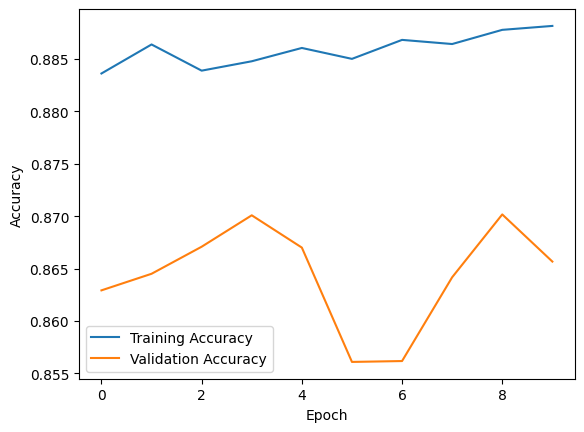

In [ ]:
model.compile(optimizer='nadam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,batch_size=32,validation_split=0.2)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f'the testing accuracy (nadam)is:{test_acc}')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training with sgd optimizer...
Epoch 1/2, Training Accuracy: 0.4934, Validation Accuracy: 0.4939
Epoch 2/2, Training Accuracy: 0.6007, Validation Accuracy: 0.6050
Test accuracy with sgd optimizer: 0.5967
Training with momentum optimizer...
Epoch 1/2, Training Accuracy: 0.6205, Validation Accuracy: 0.6259
Epoch 2/2, Training Accuracy: 0.6349, Validation Accuracy: 0.6378
Test accuracy with momentum optimizer: 0.6290
Training with nesterov optimizer...
Epoch 1/2, Training Accuracy: 0.6448, Validation Accuracy: 0.6464
Epoch 2/2, Training Accuracy: 0.6516, Validation Accuracy: 0.6518
Test accuracy with nesterov optimizer: 0.6422
Training with rmsprop optimizer...
Epoch 1/2, Training Accuracy: 0.7419, Validation Accuracy: 0.7424
Epoch 2/2, Training Accuracy: 0.7509, Validation Accuracy: 0.7495
Test accuracy with rmsprop optimizer: 0.7340
Training with adam optimizer...
Epoch 1/2, Training Accuracy: 0.7566, Validation Accuracy: 0.7551
Epoch 2/2, Training Accuracy: 0.7602, Validation Accuracy:

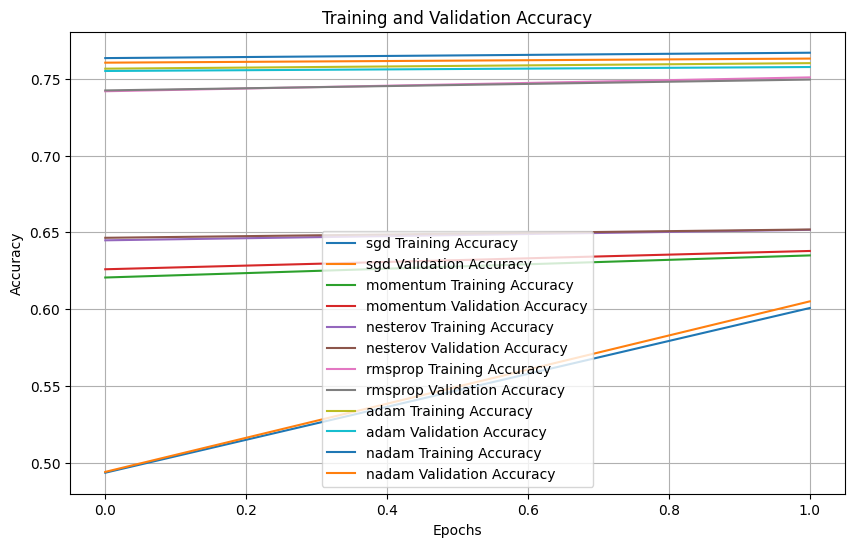

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1]))
            self.biases.append(np.random.randn(layer_sizes[i], 1))
            self.activations.append(self.sigmoid)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x))
        return exp_vals / np.sum(exp_vals, axis=0)

    def forward(self, x):
        activations = [x]
        weighted_inputs = []
        for i in range(len(self.weights)):
            weighted_input = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            weighted_inputs.append(weighted_input)
            activations.append(self.activations[i](weighted_input))
        return activations, weighted_inputs

    def backward(self, x, y, activations, weighted_inputs, learning_rate):
        output_error = activations[-1] - y
        delta = output_error * self.sigmoid_derivative(activations[-1])
        weights_gradients = []
        biases_gradients = []
        for i in range(len(self.weights)-1, -1, -1):
            weights_gradients.append(np.dot(delta, activations[i].T))
            biases_gradients.append(np.sum(delta, axis=1, keepdims=True))
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.sigmoid_derivative(activations[i])
        weights_gradients.reverse()
        biases_gradients.reverse()
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * weights_gradients[i]
            self.biases[i] -= learning_rate * biases_gradients[i]

    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, optimizer='sgd', learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        train_accuracy_history = []
        val_accuracy_history = []
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                batch_activations, batch_weighted_inputs = self.forward(x_batch.T)
                self.backward(x_batch.T, y_batch.T, batch_activations, batch_weighted_inputs, learning_rate)
            train_predictions = np.argmax(self.forward(x_train.T)[0][-1], axis=0)
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_predictions)
            train_accuracy_history.append(train_accuracy)
            val_predictions = np.argmax(self.forward(x_val.T)[0][-1], axis=0)
            val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_predictions)
            val_accuracy_history.append(val_accuracy)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return train_accuracy_history, val_accuracy_history

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]
val_split = 0.2
val_size = int(val_split * len(x_train))
x_val = x_train[:val_size]
y_val_onehot = np.eye(10)[y_train[:val_size]]
x_train = x_train[val_size:]
y_train_onehot = np.eye(10)[y_train[val_size:]]

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
nn = NeuralNetwork(input_size, hidden_sizes, output_size)
train_accuracy_history = {}
val_accuracy_history = {}
optimizers = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    train_accuracy_history[optimizer], val_accuracy_history[optimizer] = nn.train(x_train, y_train_onehot, x_val, y_val_onehot, epochs=2, batch_size=128, optimizer=optimizer)
    test_predictions = np.argmax(nn.forward(x_test.T)[0][-1], axis=0)
    accuracy = np.mean(test_predictions == y_test)
    print(f"Test accuracy with {optimizer} optimizer: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(train_accuracy_history[optimizer], label=f'{optimizer} Training Accuracy')
    plt.plot(val_accuracy_history[optimizer], label=f'{optimizer} Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with sgd optimizer...
Epoch 1/5, Training Accuracy: 0.6717, Validation Accuracy: 0.6683
Epoch 2/5, Training Accuracy: 0.7152, Validation Accuracy: 0.7119
Epoch 3/5, Training Accuracy: 0.7354, Validation Accuracy: 0.7308
Epoch 4/5, Training Accuracy: 0.7466, Validation Accuracy: 0.7423
Epoch 5/5, Training Accuracy: 0.7550, Validation Accuracy: 0.7486
Test accuracy with sgd optimizer: 0.7416
Training with momentum optimizer...
Epoch 1/5, Training Accuracy: 0.7618, Validation Accuracy: 0.7542
Epoch 2/5, Training Accuracy: 0.7661, Validation Accuracy: 0.7587
Epoch 3/5, Training Accuracy: 0.7694, Validation Accuracy: 0.7615
Epoch 4/5, Training Accuracy: 0.7725, Validation Accuracy: 0.7651
Epoch 5/5, Training Accuracy: 0.7755, Validation Accuracy: 0.7674
Test accuracy with momentum optimizer: 0.7615
Training with nesterov optimizer...
Epoch 1/5, Training Accuracy: 0.7779, Validation Accuracy: 0.7698
Epoch 2/5, Training Accuracy: 0.7801, Validation Accuracy: 0.7714
Epoch 3/5, Trainin

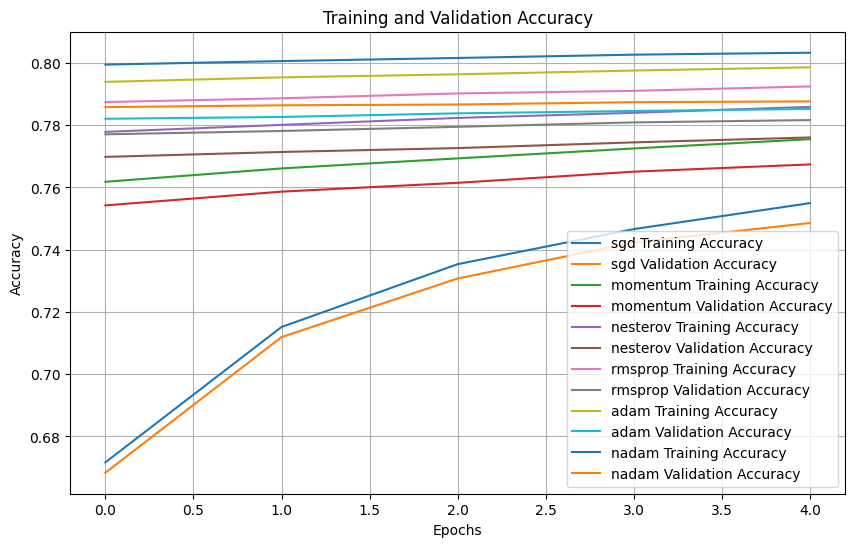

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1]))
            self.biases.append(np.random.randn(layer_sizes[i], 1))
            self.activations.append(self.sigmoid)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x))
        return exp_vals / np.sum(exp_vals, axis=0)

    def forward(self, x):
        activations = [x]
        weighted_inputs = []
        for i in range(len(self.weights)):
            weighted_input = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            weighted_inputs.append(weighted_input)
            activations.append(self.activations[i](weighted_input))
        return activations, weighted_inputs

    def backward(self, x, y, activations, weighted_inputs, learning_rate):
        output_error = activations[-1] - y
        delta = output_error * self.sigmoid_derivative(activations[-1])
        weights_gradients = []
        biases_gradients = []
        for i in range(len(self.weights)-1, -1, -1):
            weights_gradients.append(np.dot(delta, activations[i].T))
            biases_gradients.append(np.sum(delta, axis=1, keepdims=True))
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.sigmoid_derivative(activations[i])
        weights_gradients.reverse()
        biases_gradients.reverse()
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * weights_gradients[i]
            self.biases[i] -= learning_rate * biases_gradients[i]

    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, optimizer='sgd', learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        train_accuracy_history = []
        val_accuracy_history = []
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                batch_activations, batch_weighted_inputs = self.forward(x_batch.T)
                self.backward(x_batch.T, y_batch.T, batch_activations, batch_weighted_inputs, learning_rate)
            train_predictions = np.argmax(self.forward(x_train.T)[0][-1], axis=0)
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_predictions)
            train_accuracy_history.append(train_accuracy)
            val_predictions = np.argmax(self.forward(x_val.T)[0][-1], axis=0)
            val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_predictions)
            val_accuracy_history.append(val_accuracy)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return train_accuracy_history, val_accuracy_history

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]
val_split = 0.2
val_size = int(val_split * len(x_train))
x_val = x_train[:val_size]
y_val_onehot = np.eye(10)[y_train[:val_size]]
x_train = x_train[val_size:]
y_train_onehot = np.eye(10)[y_train[val_size:]]

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
nn = NeuralNetwork(input_size, hidden_sizes, output_size)
train_accuracy_history = {}
val_accuracy_history = {}
optimizers = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    train_accuracy_history[optimizer], val_accuracy_history[optimizer] = nn.train(x_train, y_train_onehot, x_val, y_val_onehot, epochs=5, batch_size=64, optimizer=optimizer)
    test_predictions = np.argmax(nn.forward(x_test.T)[0][-1], axis=0)
    accuracy = np.mean(test_predictions == y_test)
    print(f"Test accuracy with {optimizer} optimizer: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(train_accuracy_history[optimizer], label=f'{optimizer} Training Accuracy')
    plt.plot(val_accuracy_history[optimizer], label=f'{optimizer} Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with sgd optimizer...
Epoch 1/6, Training Accuracy: 0.5369, Validation Accuracy: 0.5319
Epoch 2/6, Training Accuracy: 0.7448, Validation Accuracy: 0.7422
Epoch 3/6, Training Accuracy: 0.7759, Validation Accuracy: 0.7700
Epoch 4/6, Training Accuracy: 0.7912, Validation Accuracy: 0.7821
Epoch 5/6, Training Accuracy: 0.8014, Validation Accuracy: 0.7936
Epoch 6/6, Training Accuracy: 0.8087, Validation Accuracy: 0.8011
Test accuracy with sgd optimizer: 0.7932
Training with momentum optimizer...
Epoch 1/6, Training Accuracy: 0.8147, Validation Accuracy: 0.8076
Epoch 2/6, Training Accuracy: 0.8210, Validation Accuracy: 0.8121
Epoch 3/6, Training Accuracy: 0.8258, Validation Accuracy: 0.8157
Epoch 4/6, Training Accuracy: 0.8303, Validation Accuracy: 0.8207
Epoch 5/6, Training Accuracy: 0.8336, Validation Accuracy: 0.8223
Epoch 6/6, Training Accuracy: 0.8365, Validation Accuracy: 0.8241
Test accuracy with momentum optimizer: 0.8158
Training with nesterov optimizer...
Epoch 1/6, Trainin

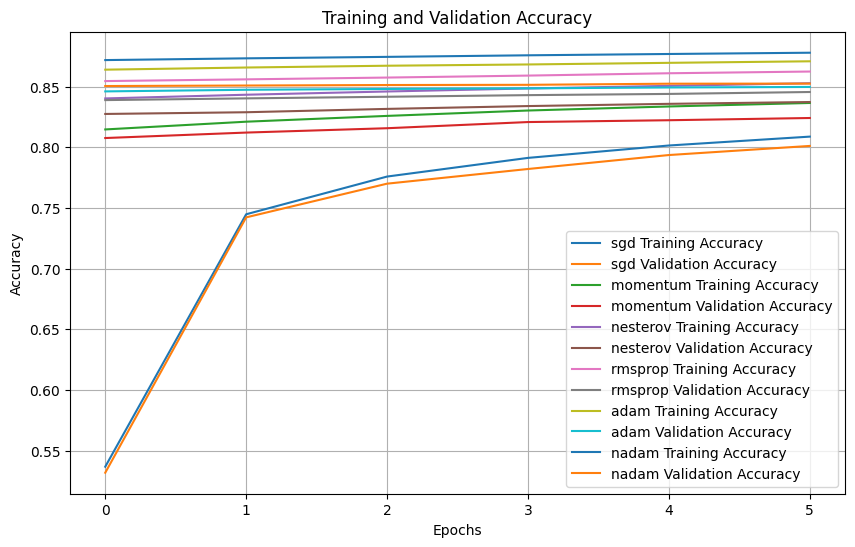

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1]))
            self.biases.append(np.random.randn(layer_sizes[i], 1))
            self.activations.append(self.sigmoid)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x))
        return exp_vals / np.sum(exp_vals, axis=0)

    def forward(self, x):
        activations = [x]
        weighted_inputs = []
        for i in range(len(self.weights)):
            weighted_input = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            weighted_inputs.append(weighted_input)
            activations.append(self.activations[i](weighted_input))
        return activations, weighted_inputs

    def backward(self, x, y, activations, weighted_inputs, learning_rate):
        output_error = activations[-1] - y
        delta = output_error * self.sigmoid_derivative(activations[-1])
        weights_gradients = []
        biases_gradients = []
        for i in range(len(self.weights)-1, -1, -1):
            weights_gradients.append(np.dot(delta, activations[i].T))
            biases_gradients.append(np.sum(delta, axis=1, keepdims=True))
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.sigmoid_derivative(activations[i])
        weights_gradients.reverse()
        biases_gradients.reverse()
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * weights_gradients[i]
            self.biases[i] -= learning_rate * biases_gradients[i]

    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, optimizer='sgd', learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        train_accuracy_history = []
        val_accuracy_history = []
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                batch_activations, batch_weighted_inputs = self.forward(x_batch.T)
                self.backward(x_batch.T, y_batch.T, batch_activations, batch_weighted_inputs, learning_rate)
            train_predictions = np.argmax(self.forward(x_train.T)[0][-1], axis=0)
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_predictions)
            train_accuracy_history.append(train_accuracy)
            val_predictions = np.argmax(self.forward(x_val.T)[0][-1], axis=0)
            val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_predictions)
            val_accuracy_history.append(val_accuracy)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return train_accuracy_history, val_accuracy_history

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]
val_split = 0.2
val_size = int(val_split * len(x_train))
x_val = x_train[:val_size]
y_val_onehot = np.eye(10)[y_train[:val_size]]
x_train = x_train[val_size:]
y_train_onehot = np.eye(10)[y_train[val_size:]]

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
nn = NeuralNetwork(input_size, hidden_sizes, output_size)
train_accuracy_history = {}
val_accuracy_history = {}
optimizers = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    train_accuracy_history[optimizer], val_accuracy_history[optimizer] = nn.train(x_train, y_train_onehot, x_val, y_val_onehot, epochs=6, batch_size=32, optimizer=optimizer)
    test_predictions = np.argmax(nn.forward(x_test.T)[0][-1], axis=0)
    accuracy = np.mean(test_predictions == y_test)
    print(f"Test accuracy with {optimizer} optimizer: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(train_accuracy_history[optimizer], label=f'{optimizer} Training Accuracy')
    plt.plot(val_accuracy_history[optimizer], label=f'{optimizer} Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with sgd optimizer...
Epoch 1/10, Training Accuracy: 0.6055, Validation Accuracy: 0.6081
Epoch 2/10, Training Accuracy: 0.6816, Validation Accuracy: 0.6817
Epoch 3/10, Training Accuracy: 0.7126, Validation Accuracy: 0.7064
Epoch 4/10, Training Accuracy: 0.7260, Validation Accuracy: 0.7201
Epoch 5/10, Training Accuracy: 0.7348, Validation Accuracy: 0.7266
Epoch 6/10, Training Accuracy: 0.7401, Validation Accuracy: 0.7315
Epoch 7/10, Training Accuracy: 0.7444, Validation Accuracy: 0.7363
Epoch 8/10, Training Accuracy: 0.7487, Validation Accuracy: 0.7397
Epoch 9/10, Training Accuracy: 0.7515, Validation Accuracy: 0.7435
Epoch 10/10, Training Accuracy: 0.7551, Validation Accuracy: 0.7472
Test accuracy with sgd optimizer: 0.7377
Training with momentum optimizer...
Epoch 1/10, Training Accuracy: 0.7571, Validation Accuracy: 0.7507
Epoch 2/10, Training Accuracy: 0.7596, Validation Accuracy: 0.7524
Epoch 3/10, Training Accuracy: 0.7613, Validation Accuracy: 0.7550
Epoch 4/10, Training

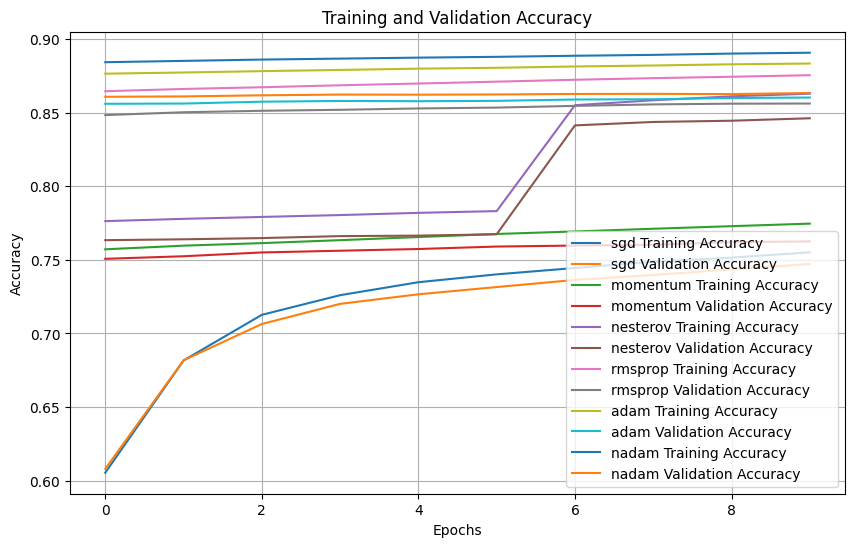

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1]))
            self.biases.append(np.random.randn(layer_sizes[i], 1))
            self.activations.append(self.sigmoid)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x))
        return exp_vals / np.sum(exp_vals, axis=0)

    def forward(self, x):
        activations = [x]
        weighted_inputs = []
        for i in range(len(self.weights)):
            weighted_input = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            weighted_inputs.append(weighted_input)
            activations.append(self.activations[i](weighted_input))
        return activations, weighted_inputs

    def backward(self, x, y, activations, weighted_inputs, learning_rate):
        output_error = activations[-1] - y
        delta = output_error * self.sigmoid_derivative(activations[-1])
        weights_gradients = []
        biases_gradients = []
        for i in range(len(self.weights)-1, -1, -1):
            weights_gradients.append(np.dot(delta, activations[i].T))
            biases_gradients.append(np.sum(delta, axis=1, keepdims=True))
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.sigmoid_derivative(activations[i])
        weights_gradients.reverse()
        biases_gradients.reverse()
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * weights_gradients[i]
            self.biases[i] -= learning_rate * biases_gradients[i]

    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, optimizer='sgd', learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        train_accuracy_history = []
        val_accuracy_history = []
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                batch_activations, batch_weighted_inputs = self.forward(x_batch.T)
                self.backward(x_batch.T, y_batch.T, batch_activations, batch_weighted_inputs, learning_rate)
            train_predictions = np.argmax(self.forward(x_train.T)[0][-1], axis=0)
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_predictions)
            train_accuracy_history.append(train_accuracy)
            val_predictions = np.argmax(self.forward(x_val.T)[0][-1], axis=0)
            val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_predictions)
            val_accuracy_history.append(val_accuracy)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return train_accuracy_history, val_accuracy_history

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]
val_split = 0.2
val_size = int(val_split * len(x_train))
x_val = x_train[:val_size]
y_val_onehot = np.eye(10)[y_train[:val_size]]
x_train = x_train[val_size:]
y_train_onehot = np.eye(10)[y_train[val_size:]]

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
nn = NeuralNetwork(input_size, hidden_sizes, output_size)
train_accuracy_history = {}
val_accuracy_history = {}
optimizers = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    train_accuracy_history[optimizer], val_accuracy_history[optimizer] = nn.train(x_train, y_train_onehot, x_val, y_val_onehot, epochs=10, batch_size=64, optimizer=optimizer)
    test_predictions = np.argmax(nn.forward(x_test.T)[0][-1], axis=0)
    accuracy = np.mean(test_predictions == y_test)
    print(f"Test accuracy with {optimizer} optimizer: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    plt.plot(train_accuracy_history[optimizer], label=f'{optimizer} Training Accuracy')
    plt.plot(val_accuracy_history[optimizer], label=f'{optimizer} Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.initializers import GlorotNormal, RandomNormal
from tensorflow.keras import regularizers

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

X_train = x_train / 255.0
X_test = x_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

epochs_list = [5, 10]
hidden_layers_list = [3, 4, 5]
hidden_layer_sizes_list = [32, 64, 128]
weight_decay_list = [0, 0.0005, 0.5]
learning_rate_list = [1e-3, 1e-4]
optimizer_list = ['sgd', 'adam', 'momentum', 'nesterov', 'rmsprop', 'nadam']
batch_size_list = [16, 32, 64]
weight_initialization_list = ['random', 'xavier']
activation_functions_list = [sigmoid, tanh, relu]

def create_model(hidden_layers, hidden_layer_size, weight_decay, learning_rate, optimizer, batch_size, weight_init, activation_function):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(hidden_layers):
        if weight_init == 'random':
            init = RandomNormal()
        else:
            init = GlorotNormal()
        model.add(Dense(hidden_layer_size, activation=activation_function, kernel_initializer=init, kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == 'nesterov':
        opt = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

best_accuracy = 0
best_hyperparameters = None

for _ in range(10):
    epochs = np.random.choice(epochs_list)
    hidden_layers = np.random.choice(hidden_layers_list)
    hidden_layer_size = np.random.choice(hidden_layer_sizes_list)
    weight_decay = np.random.choice(weight_decay_list)
    learning_rate = np.random.choice(learning_rate_list)
    optimizer = np.random.choice(optimizer_list)
    batch_size = np.random.choice(batch_size_list)
    weight_init = np.random.choice(weight_initialization_list)
    activation_function = np.random.choice(activation_functions_list)

    model = create_model(hidden_layers, hidden_layer_size, weight_decay, learning_rate, optimizer, batch_size, weight_init, activation_function)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]

    print(f'Validation accuracy: {val_accuracy:.4f} | Hyperparameters: {{"epochs": {epochs}, "hidden_layers": {hidden_layers}, "hidden_layer_size": {hidden_layer_size}, "weight_decay": {weight_decay}, "learning_rate": {learning_rate}, "optimizer": "{optimizer}", "batch_size": {batch_size}, "weight_init": "{weight_init}", "activation_function": "{activation_function}"}}')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = {
            "epochs": epochs,
            "hidden_layers": hidden_layers,
            "hidden_layer_size": hidden_layer_size,
            "weight_decay": weight_decay,
            "learning_rate": learning_rate,
            "optimizer": optimizer,
            "batch_size": batch_size,
            "weight_init": weight_init,
            "activation_function": activation_function
        }

print(f'Best validation accuracy: {best_accuracy:.4f}')
print('Best hyperparameters:', best_hyperparameters)

Validation accuracy: 0.0917 | Hyperparameters: {"epochs": 10, "hidden_layers": 5, "hidden_layer_size": 32, "weight_decay": 0.0, "learning_rate": 0.0001, "optimizer": "nesterov", "batch_size": 64, "weight_init": "xavier", "activation_function": "<function sigmoid at 0x7eaba7b865f0>"}
Validation accuracy: 0.0978 | Hyperparameters: {"epochs": 10, "hidden_layers": 4, "hidden_layer_size": 32, "weight_decay": 0.5, "learning_rate": 0.0001, "optimizer": "adam", "batch_size": 16, "weight_init": "xavier", "activation_function": "<function tanh at 0x7eaba7b86440>"}
Validation accuracy: 0.2750 | Hyperparameters: {"epochs": 10, "hidden_layers": 5, "hidden_layer_size": 128, "weight_decay": 0.5, "learning_rate": 0.0001, "optimizer": "sgd", "batch_size": 64, "weight_init": "xavier", "activation_function": "<function relu at 0x7eaba7b860e0>"}
Validation accuracy: 0.5637 | Hyperparameters: {"epochs": 5, "hidden_layers": 3, "hidden_layer_size": 64, "weight_decay": 0.0, "learning_rate": 0.001, "optimizer"

Epoch 1/5
1688/1688 [==============================] - 9s 4ms/step - loss: 0.6381 - accuracy: 0.8150 - val_loss: 0.5354 - val_accuracy: 0.8487
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4937 - accuracy: 0.8582 - val_loss: 0.5308 - val_accuracy: 0.8410
Epoch 3/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4623 - accuracy: 0.8659 - val_loss: 0.4532 - val_accuracy: 0.8688
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.4436 - accuracy: 0.8719 - val_loss: 0.4547 - val_accuracy: 0.8688
Epoch 5/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4297 - accuracy: 0.8759 - val_loss: 0.4279 - val_accuracy: 0.8745
Test Accuracy: 0.8656
313/313 [==============================] - 1s 2ms/step


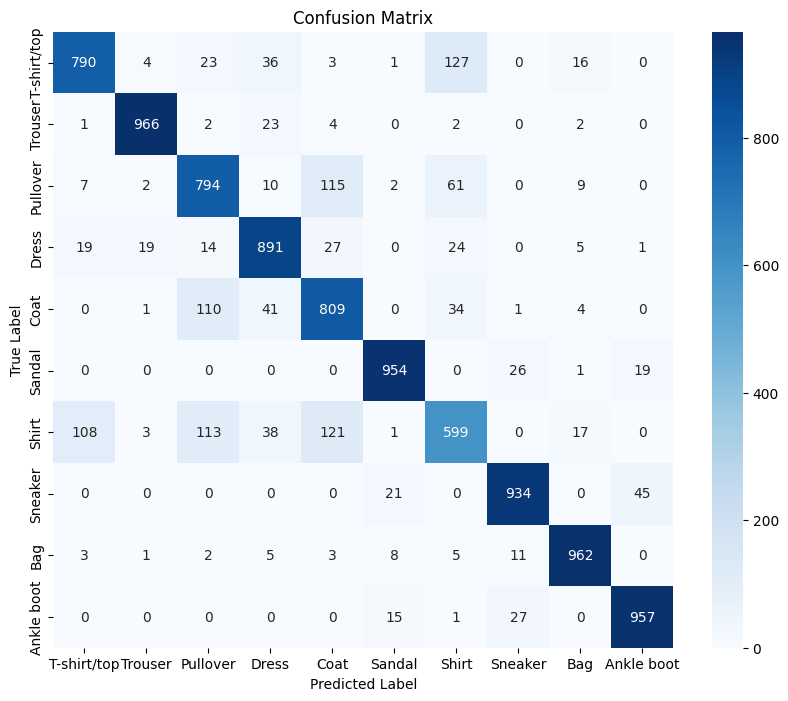

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_model = create_model(best_hyperparameters['hidden_layers'],
                           best_hyperparameters['hidden_layer_size'],
                           best_hyperparameters['weight_decay'],
                           best_hyperparameters['learning_rate'],
                           best_hyperparameters['optimizer'],
                           best_hyperparameters['batch_size'],
                           best_hyperparameters['weight_init'],
                           best_hyperparameters['activation_function'])

history = best_model.fit(X_train, y_train, epochs=best_hyperparameters['epochs'],
                         batch_size=best_hyperparameters['batch_size'],
                         validation_data=(X_val, y_val), verbose=1)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Training with sgd optimizer...
Epoch 1/5, Training Accuracy: 0.5771, Validation Accuracy: 0.5733
Epoch 2/5, Training Accuracy: 0.6581, Validation Accuracy: 0.6562
Epoch 3/5, Training Accuracy: 0.6875, Validation Accuracy: 0.6868
Epoch 4/5, Training Accuracy: 0.7038, Validation Accuracy: 0.7048
Epoch 5/5, Training Accuracy: 0.7147, Validation Accuracy: 0.7146
Test accuracy with sgd optimizer: 0.7013


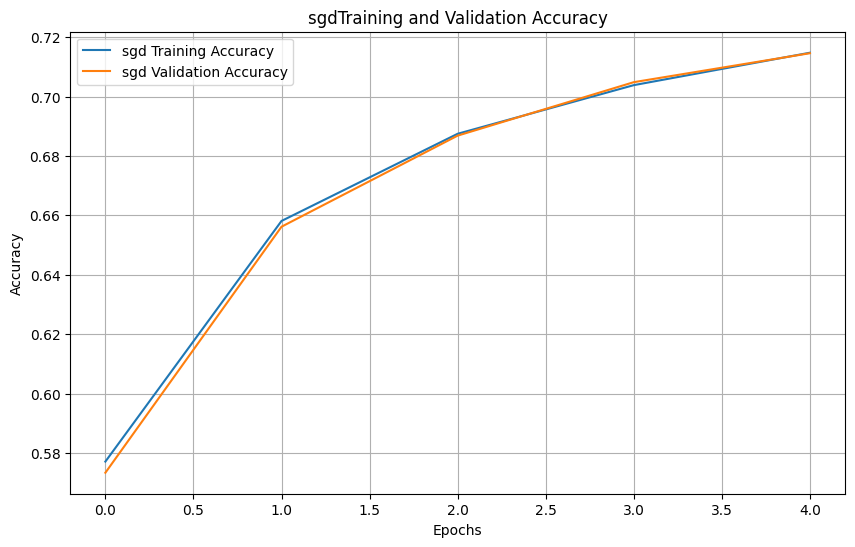

Training with momentum optimizer...
Epoch 1/5, Training Accuracy: 0.7244, Validation Accuracy: 0.7240
Epoch 2/5, Training Accuracy: 0.7996, Validation Accuracy: 0.7937
Epoch 3/5, Training Accuracy: 0.8144, Validation Accuracy: 0.8093
Epoch 4/5, Training Accuracy: 0.8215, Validation Accuracy: 0.8139
Epoch 5/5, Training Accuracy: 0.8267, Validation Accuracy: 0.8181
Test accuracy with momentum optimizer: 0.8085


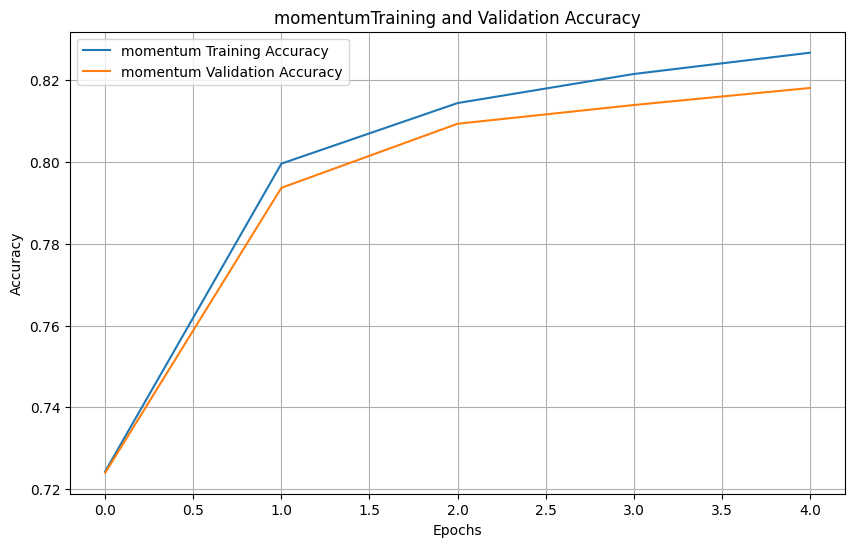

Training with nesterov optimizer...
Epoch 1/5, Training Accuracy: 0.8310, Validation Accuracy: 0.8225
Epoch 2/5, Training Accuracy: 0.8350, Validation Accuracy: 0.8257
Epoch 3/5, Training Accuracy: 0.8376, Validation Accuracy: 0.8269
Epoch 4/5, Training Accuracy: 0.8404, Validation Accuracy: 0.8294
Epoch 5/5, Training Accuracy: 0.8433, Validation Accuracy: 0.8336
Test accuracy with nesterov optimizer: 0.8225


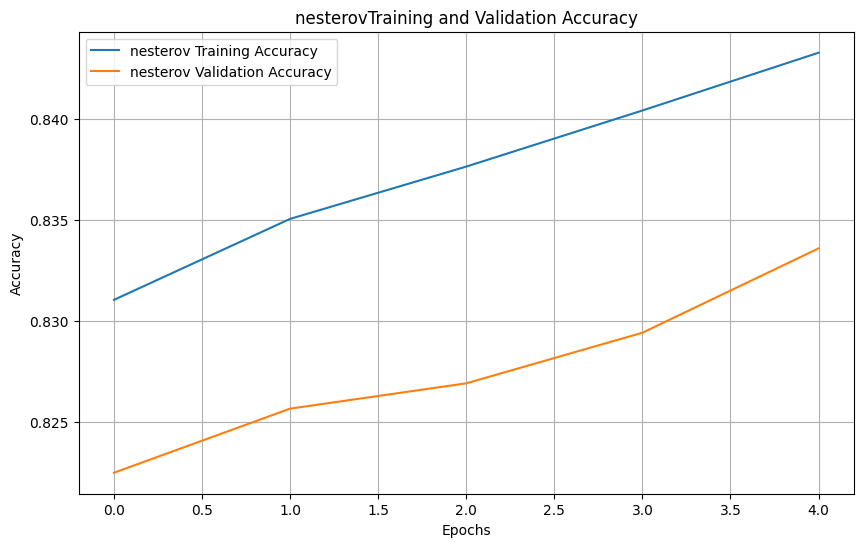

Training with rmsprop optimizer...
Epoch 1/5, Training Accuracy: 0.8456, Validation Accuracy: 0.8360
Epoch 2/5, Training Accuracy: 0.8476, Validation Accuracy: 0.8374
Epoch 3/5, Training Accuracy: 0.8501, Validation Accuracy: 0.8393
Epoch 4/5, Training Accuracy: 0.8521, Validation Accuracy: 0.8412
Epoch 5/5, Training Accuracy: 0.8543, Validation Accuracy: 0.8421
Test accuracy with rmsprop optimizer: 0.8311


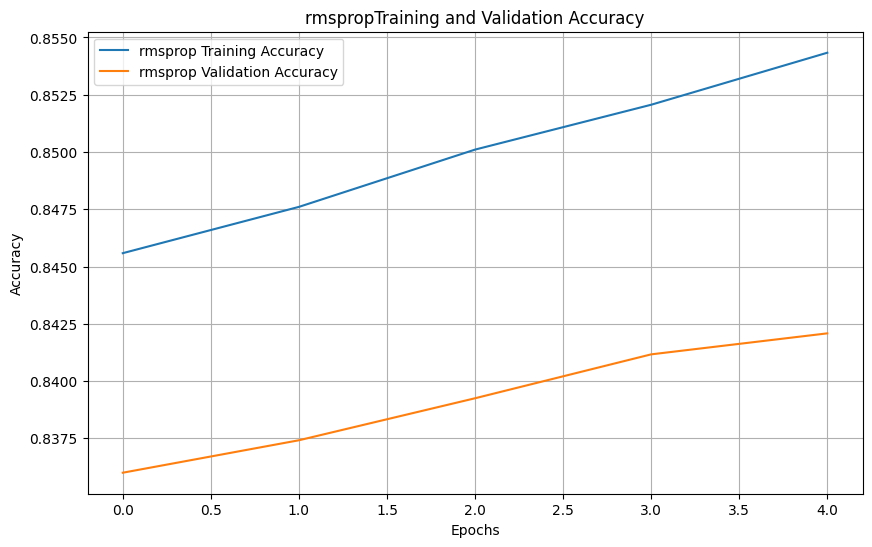

Training with adam optimizer...
Epoch 1/5, Training Accuracy: 0.8563, Validation Accuracy: 0.8440
Epoch 2/5, Training Accuracy: 0.8580, Validation Accuracy: 0.8454
Epoch 3/5, Training Accuracy: 0.8597, Validation Accuracy: 0.8455
Epoch 4/5, Training Accuracy: 0.8610, Validation Accuracy: 0.8461
Epoch 5/5, Training Accuracy: 0.8622, Validation Accuracy: 0.8468
Test accuracy with adam optimizer: 0.8379


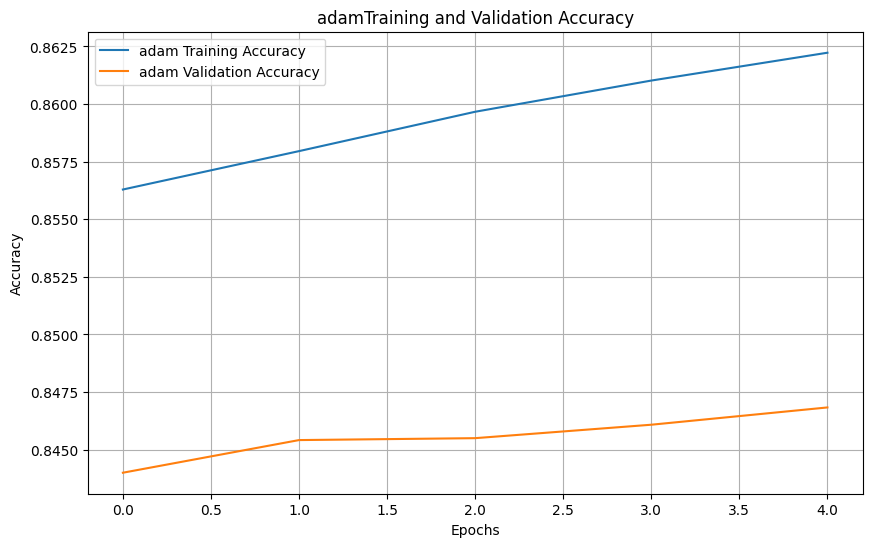

Training with nadam optimizer...
Epoch 1/5, Training Accuracy: 0.8638, Validation Accuracy: 0.8477
Epoch 2/5, Training Accuracy: 0.8650, Validation Accuracy: 0.8490
Epoch 3/5, Training Accuracy: 0.8664, Validation Accuracy: 0.8495
Epoch 4/5, Training Accuracy: 0.8676, Validation Accuracy: 0.8506
Epoch 5/5, Training Accuracy: 0.8691, Validation Accuracy: 0.8513
Test accuracy with nadam optimizer: 0.8407


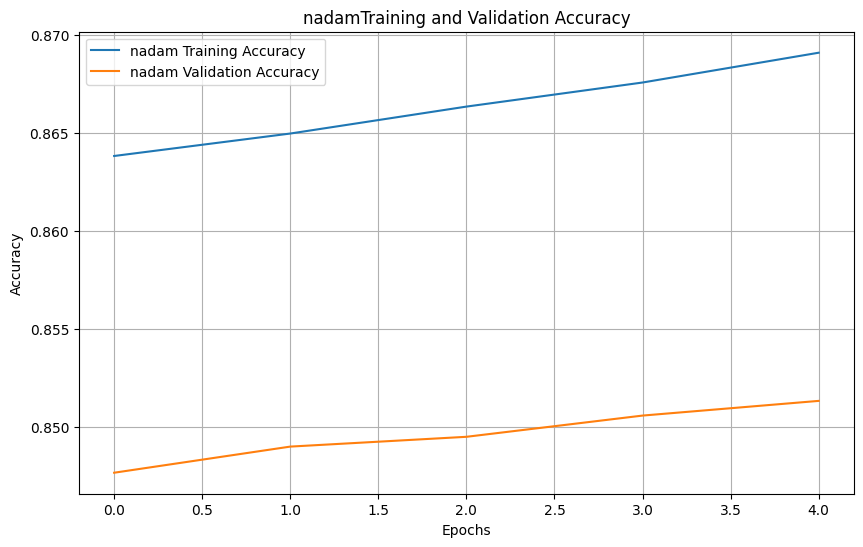

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(1, len(layer_sizes)):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i-1]))
            self.biases.append(np.random.randn(layer_sizes[i], 1))
            self.activations.append(self.sigmoid)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_vals = np.exp(x - np.max(x))
        return exp_vals / np.sum(exp_vals, axis=0)

    def forward(self, x):
        activations = [x]
        weighted_inputs = []
        for i in range(len(self.weights)):
            weighted_input = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            weighted_inputs.append(weighted_input)
            activations.append(self.activations[i](weighted_input))
        return activations, weighted_inputs

    def backward(self, x, y, activations, weighted_inputs, learning_rate):
        output_error = activations[-1] - y
        delta = output_error * self.sigmoid_derivative(activations[-1])
        weights_gradients = []
        biases_gradients = []
        for i in range(len(self.weights)-1, -1, -1):
            weights_gradients.append(np.dot(delta, activations[i].T))
            biases_gradients.append(np.sum(delta, axis=1, keepdims=True))
            if i > 0:
                delta = np.dot(self.weights[i].T, delta) * self.sigmoid_derivative(activations[i])
        weights_gradients.reverse()
        biases_gradients.reverse()
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * weights_gradients[i]
            self.biases[i] -= learning_rate * biases_gradients[i]

    def train(self, x_train, y_train, x_val, y_val, epochs, batch_size, optimizer='sgd', learning_rate=0.01, momentum=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8):
        train_accuracy_history = []
        val_accuracy_history = []
        for epoch in range(epochs):
            for i in range(0, len(x_train), batch_size):
                x_batch = x_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                batch_activations, batch_weighted_inputs = self.forward(x_batch.T)
                self.backward(x_batch.T, y_batch.T, batch_activations, batch_weighted_inputs, learning_rate)
            train_predictions = np.argmax(self.forward(x_train.T)[0][-1], axis=0)
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == train_predictions)
            train_accuracy_history.append(train_accuracy)
            val_predictions = np.argmax(self.forward(x_val.T)[0][-1], axis=0)
            val_accuracy = np.mean(np.argmax(y_val, axis=1) == val_predictions)
            val_accuracy_history.append(val_accuracy)
            print(f"Epoch {epoch+1}/{epochs}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        return train_accuracy_history, val_accuracy_history

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]
val_split = 0.2
val_size = int(val_split * len(x_train))
x_val = x_train[:val_size]
y_val_onehot = np.eye(10)[y_train[:val_size]]
x_train = x_train[val_size:]
y_train_onehot = np.eye(10)[y_train[val_size:]]

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
nn = NeuralNetwork(input_size, hidden_sizes, output_size)
train_accuracy_history = {}
val_accuracy_history = {}
optimizers = ['sgd', 'momentum', 'nesterov', 'rmsprop', 'adam', 'nadam']
for optimizer in optimizers:
    print(f"Training with {optimizer} optimizer...")
    train_accuracy_history[optimizer], val_accuracy_history[optimizer] = nn.train(x_train, y_train_onehot, x_val, y_val_onehot, epochs=5, batch_size=128, optimizer=optimizer)
    test_predictions = np.argmax(nn.forward(x_test.T)[0][-1], axis=0)
    accuracy = np.mean(test_predictions == y_test)
    print(f"Test accuracy with {optimizer} optimizer: {accuracy:.4f}")

    # Plot accuracy curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracy_history[optimizer], label=f'{optimizer} Training Accuracy')
    plt.plot(val_accuracy_history[optimizer], label=f'{optimizer} Validation Accuracy')
    plt.title(label=f'{optimizer}Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5110 - accuracy: 0.8153 - val_loss: 0.4051 - val_accuracy: 0.8498
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3778 - accuracy: 0.8590 - val_loss: 0.4342 - val_accuracy: 0.8403
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3384 - accuracy: 0.8760 - val_loss: 0.3683 - val_accuracy: 0.8672
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3126 - accuracy: 0.8845 - val_loss: 0.3708 - val_accuracy: 0.8673
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2949 - accuracy: 0.8891 - val_loss: 0.3348 - val_accuracy: 0.8789
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2823 - accuracy: 0.8945 - val_loss: 0.3652 - val_accuracy: 0.8743
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.8982 - val_loss: 0.3568 - val_accuracy:

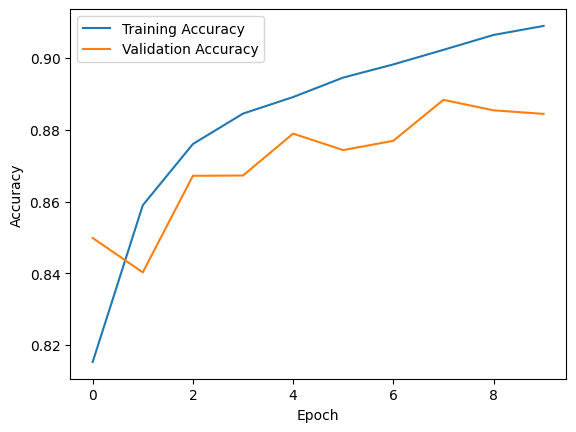

In [19]:
def build_model(num_hidden_layers, num_neurons):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

num_hidden_layers = 3
num_neurons = 128

model = build_model(num_hidden_layers, num_neurons)

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


history=model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
